# Training and testing the model

* Open all the datasets

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt 

In [41]:
Df = pd.read_csv('./DataSets/PreProcessed_EnergyConsumption_WeatherData.csv', header=0)
Df.head()

,Time,Energy Usage,t,tp,rf,wr,wg,wsr,wsg,regen,ldred,ldstat,sonne
0,2021-01-27 11:00:00,8.03,0.0,-3.8,75.0,130.0,3.6,NaN,7.6,0.0,1018.4,973.5,93.0
1,2021-01-27 12:00:00,6.85,1.9,-3.3,68.0,150.0,5.4,NaN,9.4,0.0,1017.7,973.1,66.0
2,2021-01-27 13:00:00,8.86,3.5,-2.8,63.0,190.0,7.6,NaN,11.2,0.0,1016.8,972.5,100.0
3,2021-01-27 14:00:00,7.37,4.4,-5.3,49.0,120.0,9.4,NaN,14.8,0.0,1016.3,972.1,99.0
4,2021-01-27 15:00:00,7.67,5.0,-7.6,40.0,150.0,5.4,NaN,11.2,0.0,1015.5,971.5,100.0


In [42]:
DfH = pd.read_csv('./DataSets/EnergyReading_Days_Dataset.csv', header=0)
DfH.head()

,Time,Holiday,Week Day,Energy Usage,cos_x,sin_x
0,2021-01-27 11:00:00,0.0,2,8.03,-0.222521,0.974928
1,2021-01-27 12:00:00,0.0,2,6.85,-0.222521,0.974928
2,2021-01-27 13:00:00,0.0,2,8.86,-0.222521,0.974928
3,2021-01-27 14:00:00,0.0,2,7.37,-0.222521,0.974928
4,2021-01-27 15:00:00,0.0,2,7.67,-0.222521,0.974928


### Merge the holidays and week day decoding 

In [43]:
Df.insert(1,'Holiday',DfH["Holiday"])
Df.insert(1,'Cos',DfH["cos_x"])
Df.insert(1,'Sin',DfH["sin_x"])
Df.insert(1,'Week Day',DfH["Week Day"])

In [44]:
Df =Df.reindex(columns=["Time","Sin","Cos","Holiday","t","Energy Usage"])

### Splitting the Time 

In [45]:
from datetime import datetime as dt 
def SplitTime(data,col): 
    
    year = [] 
    month = [] 
    day = [] 
    hour = [] 
    
    for str_date in data[col]: 
        dti = dt.strptime(str_date, "%Y-%m-%d %H:%M:%S")
        year.append(dti.year)
        month.append(dti.month)
        day.append(dti.day)
        hour.append(dti.hour)
   
    #Delete the old column
    data.drop(col, inplace = True, axis=1) 

    #Insert the newone
    data.insert(0, 'year',year)
    data.insert(1, 'month',month)
    data.insert(2, 'day',day)
    data.insert(3, 'hour',hour)

    return data

CDf= SplitTime(Df,'Time')

In [46]:
Df.to_csv("./DataSets/DataSet_complete.csv",index=False)

In [47]:
Df

,year,month,day,hour,Sin,Cos,Holiday,t,Energy Usage
0,2021,1,27,11,0.974928,-0.222521,0.0,0.0,8.03
1,2021,1,27,12,0.974928,-0.222521,0.0,1.9,6.85
2,2021,1,27,13,0.974928,-0.222521,0.0,3.5,8.86
3,2021,1,27,14,0.974928,-0.222521,0.0,4.4,7.37
4,2021,1,27,15,0.974928,-0.222521,0.0,5.0,7.67
...,...,...,...,...,...,...,...,...,...
6721,2021,11,3,12,0.974928,-0.222521,0.0,5.7,6.68
6722,2021,11,3,13,0.974928,-0.222521,0.0,6.7,7.26
6723,2021,11,3,14,0.974928,-0.222521,0.0,7.3,6.81
6724,2021,11,3,15,0.974928,-0.222521,0.0,7.4,8.81


# Machine learning models

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

## Linear Regression Model 

In [49]:
import seaborn as sns 
%matplotlib inline 

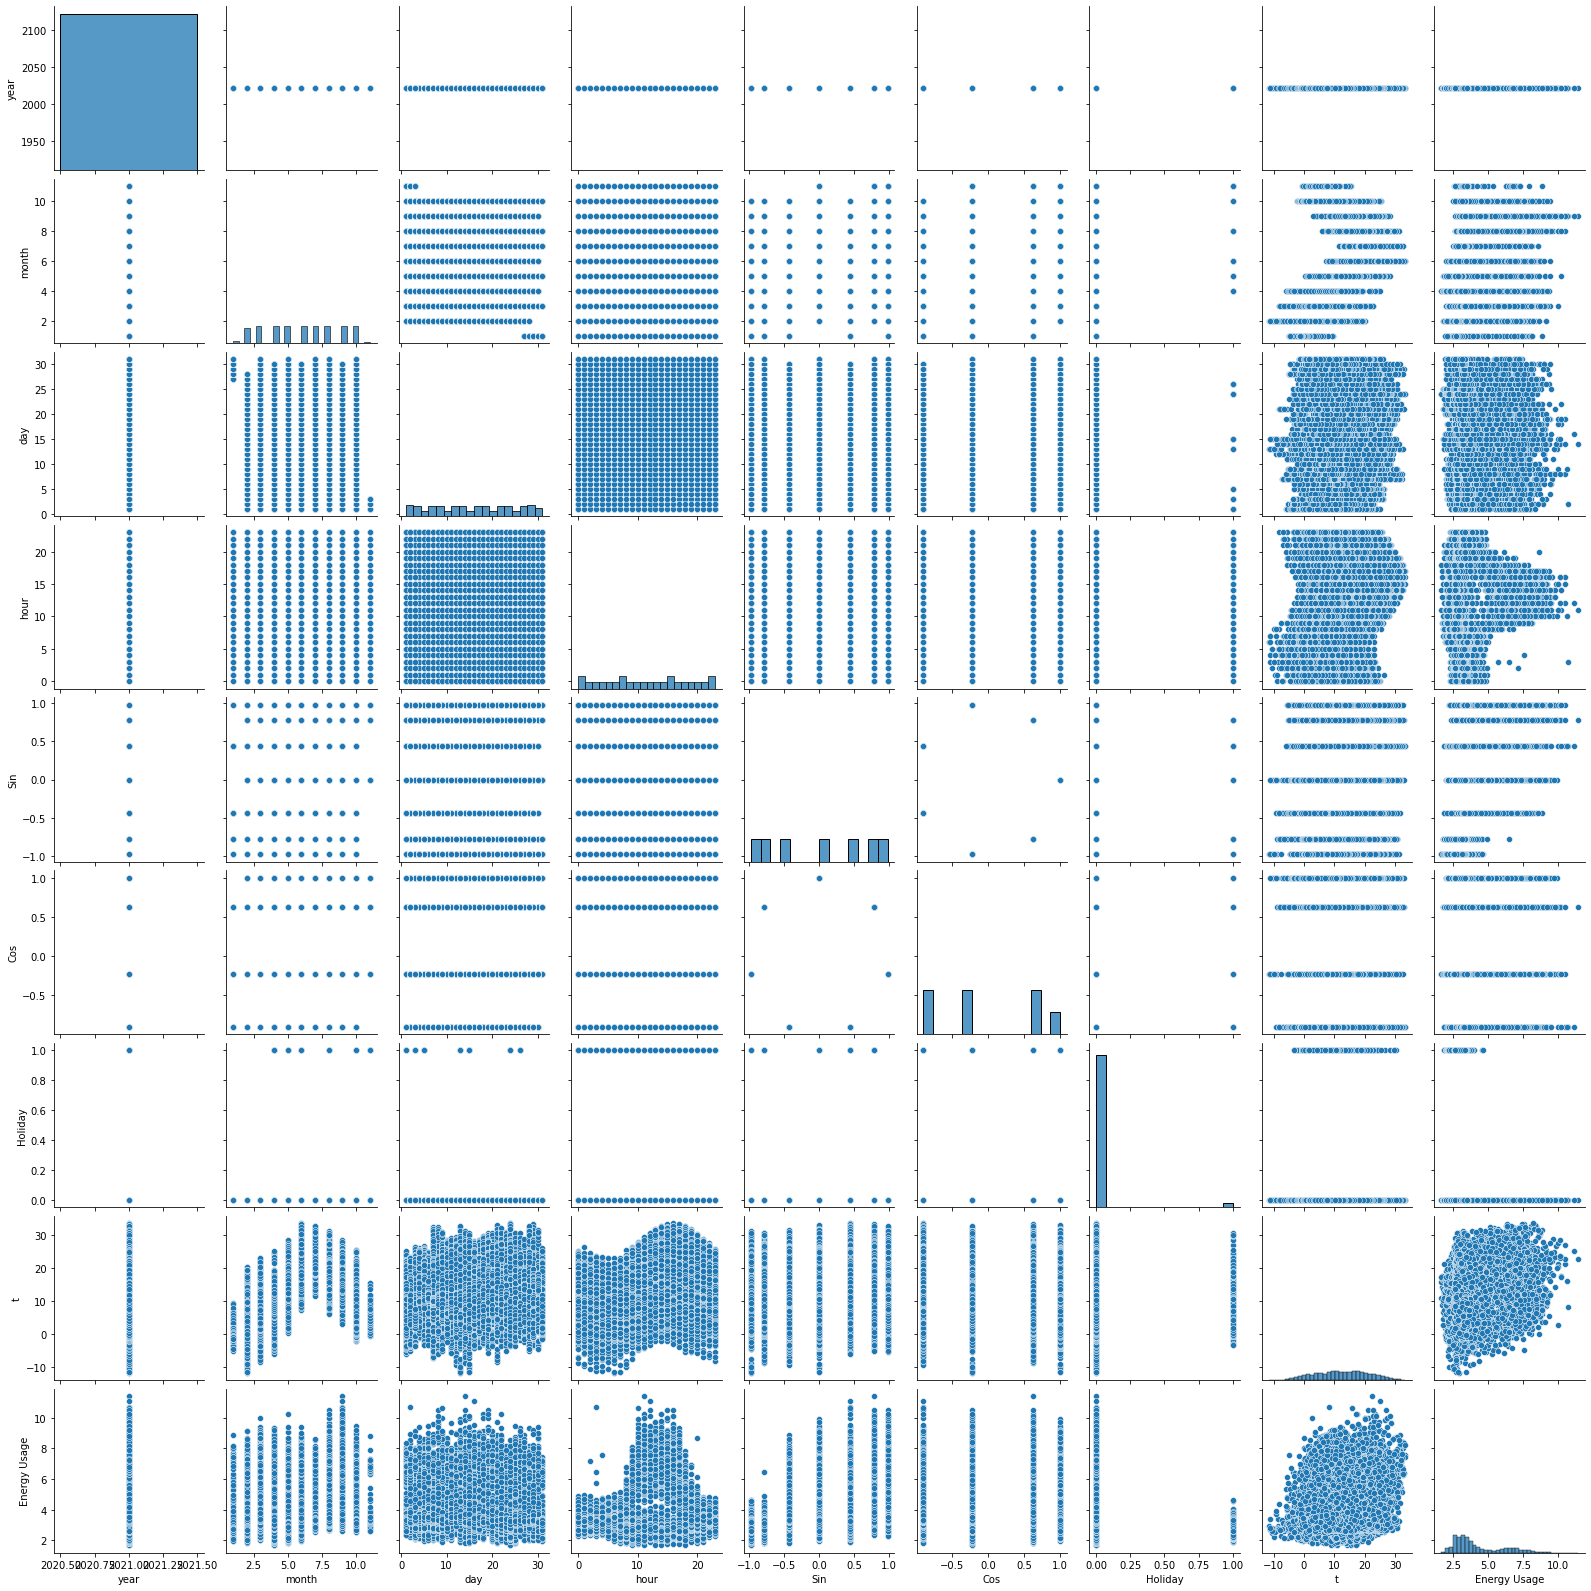

In [50]:
sns.pairplot(Df)

### Split Test and Training Data 

In [51]:
X = Df[["month","day","hour","Sin","Cos",'Holiday','t']]
Y = Df['Energy Usage']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Training the model

In [53]:
LinearReg = LinearRegression()
LinearReg.fit(X_train, y_train)

LinearRegression()

### Testing the model 

In [54]:
from sklearn.metrics import r2_score, mean_squared_error

* Save the output of the model when we test it with the remaining values out ouf our data frame

In [55]:
y_train_predict = LinearReg.predict(X_train)

* Model perfomance with the training set

In [56]:
rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2_train= r2_score(y_train, y_train_predict)

print('RMSE is {}'.format(rmse_train))
print('R2 score is {}'.format(r2_train))

RMSE is 1.476847918705216
R2 score is 0.3086872646136273


* Model perfomance with the testing set 

In [57]:
y_test_predict = LinearReg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

RMSE is 1.50869866083442
R2 score is 0.30035019735633195


* Plotting real value vs predicted values 

<Figure size 432x288 with 0 Axes>

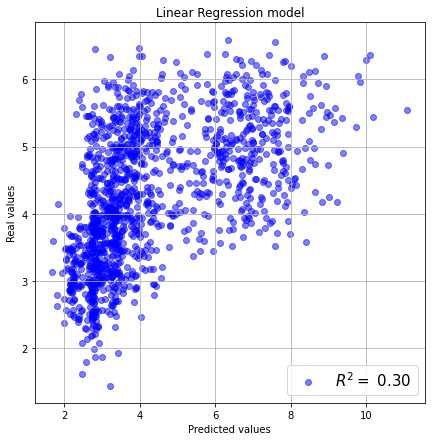

In [58]:
plt.figure()
plt.figure(figsize=(7, 7))
plt.grid()
plt.scatter(y_test, y_test_predict,alpha=0.5,
            color='blue',label=r'$R^2 = $ {:.2f}'.format(r2))
plt.title("Linear Regression model")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.legend(prop={'size': 15})
plt.savefig("./Imgs/linear_regression_model.png",transparent=True)

plt.show()

 We could conclude that this model is not the indicated for this prediction. We've got a low $R^2$ and with the plot we could see that the real values and the predicted ones are not matching. 
 Seems like for the most of the real values the model has an output of a value between 2 and 4, and also other cluster between 6 and 8

## Decision Tree Regressor model 

* Model training

In [59]:
DecTreeReg= DecisionTreeRegressor()
DecTreeReg.fit(X_train, y_train)

DecisionTreeRegressor()

* Model testing

In [60]:
predictions=DecTreeReg.predict(X_test)

* Model perfomance

In [61]:
r2=r2_score(y_test, predictions)
print("Perfomance for training set {:.2f}".format(r2))

Perfomance for training set 0.89


<Figure size 432x288 with 0 Axes>

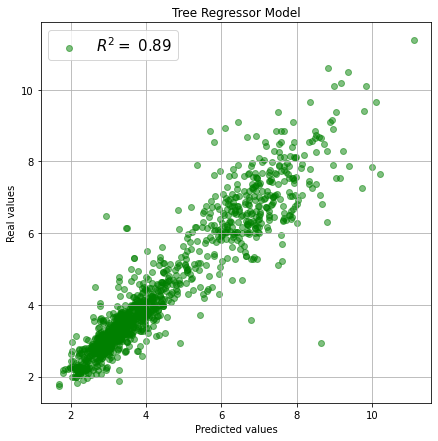

In [70]:
plt.figure()
plt.figure(figsize=(7, 7))
plt.grid()
plt.scatter(y_test,predictions,alpha=0.5
        ,color='green',label=r'$R^2 = $ {:.2f}'.format(r2))
plt.title("Tree Regressor Model")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.legend(prop={'size': 15})
plt.savefig("./Imgs/tree_regressor_model.png",transparent=True)
plt.show()

## MLPRegressor model 

* Model training

In [86]:
MLPR= MLPRegressor()
MLPR.fit(X_train, y_train)

/home/matias_dogliani/virtual_envs/BigData/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

* Model testing

In [103]:
predictions=MLPR.predict(X_test)

In [104]:
r2=r2_score(y_test, predictions)
print(r2)

0.8248056319786798


<Figure size 432x288 with 0 Axes>

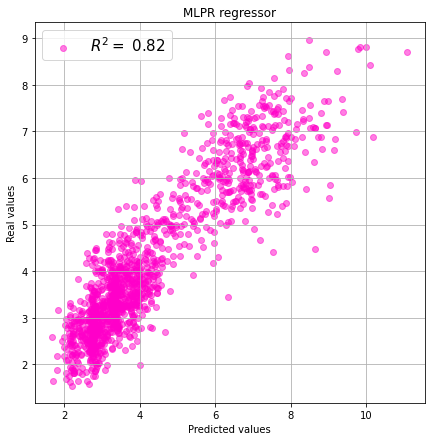

In [105]:
plt.figure()
plt.figure(figsize=(7, 7))
plt.grid()
plt.scatter(y_test,predictions,alpha=0.5
        ,color='#ff00c9',label=r'$R^2 = $ {:.2f}'.format(r2))
plt.title("MLPR regressor")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.legend(prop={'size': 15})
plt.savefig("./Imgs/MLPR_regressor_model.png",transparent=True)
plt.show()

* Model perfomance

## SVR regressor model 

In [93]:
from sklearn.svm import SVR

* Training the model 

In [95]:
SVRregressor = SVR()
SVRregressor.fit(X_train, y_train)

SVR()

* Test the model

In [107]:
predictions=SVRregressor.predict(X_test)

In [108]:
r2=r2_score(y_test, predictions)
print(r2)

0.5540295301737705


<Figure size 432x288 with 0 Axes>

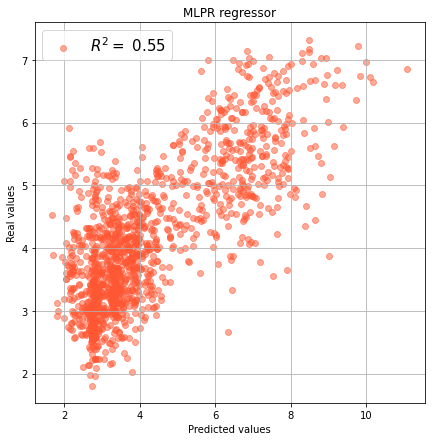

In [109]:
plt.figure()
plt.figure(figsize=(7, 7))
plt.grid()
plt.scatter(y_test,predictions,alpha=0.5
        ,color='#FF5733',label=r'$R^2 = $ {:.2f}'.format(r2))
plt.title("MLPR regressor")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.legend(prop={'size': 15})
plt.savefig("./Imgs/SVLR_regressor_model.png",transparent=True)
plt.show()

# Using the model 

In [121]:
Df = pd.read_csv("./DataSets/Preprocessed_Forecast_DataSet.csv")
Df.head()

,month,day,hour,sin_x,cos_x,Holiday,t
0,11,22,12,0.000000,1.0,0.0,5.58
1,11,22,15,0.000000,1.0,0.0,6.03
2,11,22,18,0.000000,1.0,0.0,5.76
3,11,22,21,0.000000,1.0,0.0,5.33
4,11,23,0,0.866025,0.5,0.0,4.14


In [122]:
Df.insert(3,"Sin",Df["sin_x"])
Df.insert(4,"Cos",Df["cos_x"])
Df.head()

,month,day,hour,Sin,Cos,sin_x,cos_x,Holiday,t
0,11,22,12,0.000000,1.0,0.000000,1.0,0.0,5.58
1,11,22,15,0.000000,1.0,0.000000,1.0,0.0,6.03
2,11,22,18,0.000000,1.0,0.000000,1.0,0.0,5.76
3,11,22,21,0.000000,1.0,0.000000,1.0,0.0,5.33
4,11,23,0,0.866025,0.5,0.866025,0.5,0.0,4.14


In [123]:
Df= Df.drop("sin_x",axis=1)
Df = Df.drop("cos_x",axis=1)

In [153]:
Df.head()

,Time,Sin,Cos,Holiday,t,Energy usage
0,2021-11-22 12:00:00,0.000000,1.0,0.0,5.58,7.55
1,2021-11-22 15:00:00,0.000000,1.0,0.0,6.03,7.55
2,2021-11-22 18:00:00,0.000000,1.0,0.0,5.76,6.58
3,2021-11-22 21:00:00,0.000000,1.0,0.0,5.33,3.52
4,2021-11-23 00:00:00,0.866025,0.5,0.0,4.14,3.29


In [99]:
predictions=DecTreeReg.predict(Df)

In [125]:
Df.insert(7,"Energy usage",predictions)

In [126]:
def Convertstr2dt(data,col): 
    dates=[]
    for idx,value in enumerate(data[col]): 
        str_date = '2021-' + str(data['month'][idx])+ '-' + str(data['day'][idx])+ ' ' + str(data['hour'][idx])
        dti = dt.strptime(str_date, "%Y-%m-%d %H")
        dates.append(dti)
   
    #Delete the old column
    data.drop('month', inplace = True, axis=1) 
    data.drop('day', inplace = True, axis=1) 
    data.drop('hour', inplace = True, axis=1) 
    #Insert the newone
    data.insert(0, 'Time',dates)
    return data

Df = Convertstr2dt(Df,'month')


In [154]:
Df.head()

,Time,Sin,Cos,Holiday,t,Energy usage
0,2021-11-22 12:00:00,0.000000,1.0,0.0,5.58,7.55
1,2021-11-22 15:00:00,0.000000,1.0,0.0,6.03,7.55
2,2021-11-22 18:00:00,0.000000,1.0,0.0,5.76,6.58
3,2021-11-22 21:00:00,0.000000,1.0,0.0,5.33,3.52
4,2021-11-23 00:00:00,0.866025,0.5,0.0,4.14,3.29


In [128]:
def Plotday(df,day, MonthNum,year=2021): 
    x = []
    y = [] 

    for idx,value in enumerate(df["Time"]):
        if value.month == MonthNum and value.day == day: 
            x.append(df["t"][idx])
            y.append(value.hour)
            #print(value.hour)
            
    if not x and not y: 
        print("Missing day")
        return -1 
    
    fig=plt.figure(figsize=(15,8))
    plt.grid()
    plt.title("Daily Weather" + ": " + str(day) + "/" + str(MonthNum))
    plt.plot(y,x,alpha=0.8, color='orange', lw="0.75",linestyle="--", marker="o",markersize=8)
    plt.xlabel("Hour")
    plt.ylabel("Energy KWh")
   
    #plt.savefig("./Imgs/Temperature_daily" + str(day)+ "_"+ str(MonthNum)+ ".png",transparent=True)

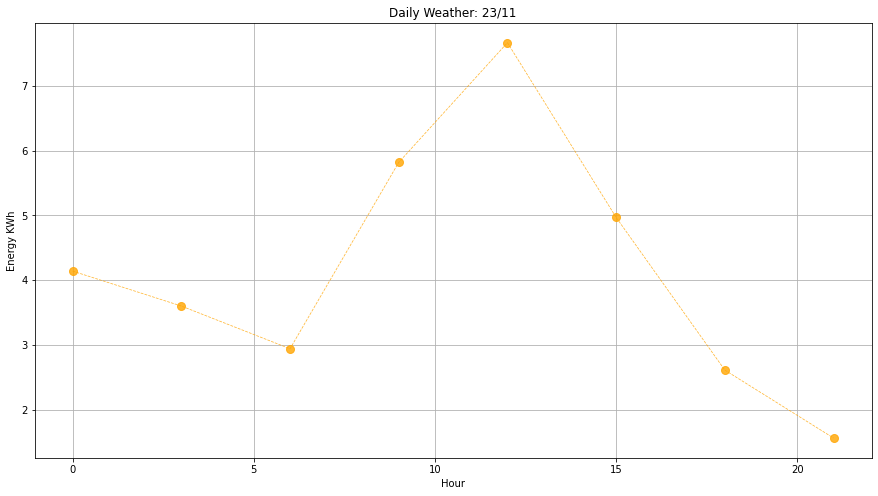

In [130]:
Plotday(Df,23,11)

In [170]:
x = []
y = [] 
Nhours = []  
HourChangeidx = [] 
    

for idx, value in enumerate(Df["Time"]): 
    #if value.day == 23 or value.day == 24:
    if True: 
        x.append(Df["Energy usage"][idx])
        y.append(idx)
        print(value.strftime("%A"))
        
    if Nhours and Nhours[-1] != value.hour: 
        Nhours.append(value.hour)
        HourChangeidx.append(idx)
    elif not Nhours: 
        Nhours.append(value.hour)
        HourChangeidx.append(idx)

Monday
Monday
Monday
Monday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Wednesday
Wednesday
Wednesday
Wednesday
Wednesday
Wednesday
Wednesday
Wednesday
Thursday
Thursday
Thursday
Thursday
Thursday
Thursday
Thursday
Thursday
Friday
Friday
Friday
Friday
Friday
Friday
Friday
Friday
Saturday
Saturday
Saturday
Saturday


Text(0, 0.5, 'Energy KWh')

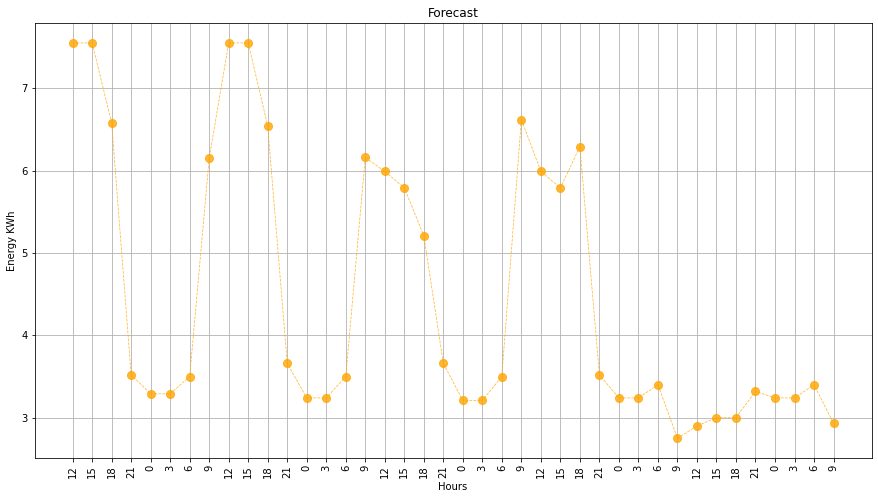

In [171]:
fig=plt.figure(figsize=(15,8))
plt.grid()
plt.title("Forecast")
plt.xticks(HourChangeidx,Nhours ,rotation=90)
plt.xticks()
plt.plot(y,x,alpha=0.8, color='orange', lw="0.75",linestyle="--", marker="o",markersize=8)

#plt.plot(Df["Energy usage"][:20].index,Df["Energy usage"][:20],alpha=0.8, color='orange', lw="0.75",linestyle="--", marker="o",markersize=8)
plt.xlabel("Hours")
plt.ylabel("Energy KWh")


* Day label plot (Whole week) 

In [172]:
# to do 